In [ ]:
# !pip install pandas-datareader
# import pandas_datareader as pdr

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
# from sklearn import  sklearn

In [4]:
start = dt.datetime(2010, 1, 29)
end = dt.datetime.today()
df = web.DataReader('^SPX', 'stooq')

df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-18,2651.27,2675.47,2647.58,2670.71,2.214850e+09
2019-01-17,2609.28,2645.06,2606.36,2635.96,2.095706e+09
2019-01-16,2614.75,2625.76,2612.68,2616.10,2.146539e+09
2019-01-15,2585.10,2613.08,2585.10,2610.30,1.984628e+09
2019-01-14,2580.31,2589.32,2570.41,2582.61,2.035806e+09


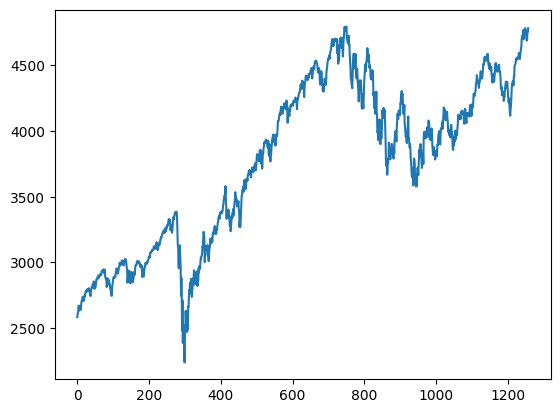

In [5]:
testprices = np.array(df["Close"])[-1:0:-1]
plt.plot(testprices)

In [28]:
def k_days_back(vals, k):
    vals1 = vals[0:-k]
    vals2 = vals[k:]
    ds = 100 * (vals2-vals1) / vals1
    return ds

def ks_days_back(vals, ks):
    m = max(ks)
    ds_1 = k_days_back(vals, 1)
    y = ds_1[m:]
    n = y.shape[0]
    ds_0 = np.array([0]*n).reshape(-1,1)

    for k in ks:
        ds_k = k_days_back(testprices, k)
        ds_k = ds_k[(m-k):-1].reshape(-1,1)
        ds_0 = np.concatenate((ds_0, ds_k), axis=1)

    ds_0 = ds_0[:, 1:]
    return n, ds_0, y

n, X, y = ks_days_back(testprices, range(1,30))

In [119]:
split_i = math.ceil(0.8*n)
# split_i = 1150
X_train = X[0:split_i]
y_train = y[0:split_i]
X_test = X[split_i:]
y_test = y[split_i:]
X.shape

(1227, 29)

## LINEAR REGRESSION

### test on test data

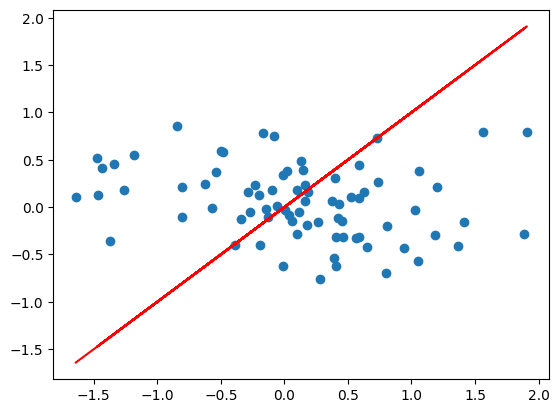

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'red')
plt.show()

In [43]:
A = reg.coef_
b = reg.intercept_
A,b

(array([ 0.02567391, -0.05444609,  0.05079611, -0.13950958,  0.01804526,
        -0.05382537, -0.0457093 , -0.0499351 ,  0.13416028, -0.00960127,
         0.06882625, -0.03544785,  0.01393712,  0.02249957,  0.16167312,
        -0.0188365 , -0.13038045, -0.00787337, -0.06776722, -0.04641659,
         0.12358205, -0.0187807 ,  0.03862512, -0.09963609,  0.12408472,
         0.00054147, -0.06807166, -0.04436789,  0.01092015]),
 0.11151248467355471)

In [44]:
tp = np.dot((1 * (y_pred>0.06)), (1 * (y_test>0.06)))
tn = np.dot((1 * (y_pred<0.06)), (1 * (y_test<0.06)))
n_test = y_test.shape[0]
print(tp, tn, ((tp+tn)/n_test))
reg.score(X_test, y_test)

18 14 0.4155844155844156


-0.47372607713349724

### test on train data

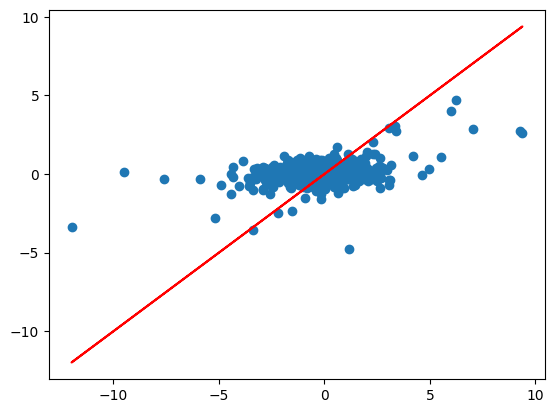

In [147]:
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_train)
plt.scatter(y_train, y_pred)
plt.plot(y_train, y_train, color='red')
plt.show()

In [46]:
A = reg.coef_
b = reg.intercept_
A, b

(array([ 0.02567391, -0.05444609,  0.05079611, -0.13950958,  0.01804526,
        -0.05382537, -0.0457093 , -0.0499351 ,  0.13416028, -0.00960127,
         0.06882625, -0.03544785,  0.01393712,  0.02249957,  0.16167312,
        -0.0188365 , -0.13038045, -0.00787337, -0.06776722, -0.04641659,
         0.12358205, -0.0187807 ,  0.03862512, -0.09963609,  0.12408472,
         0.00054147, -0.06807166, -0.04436789,  0.01092015]),
 0.11151248467355471)

In [47]:
tp = np.dot((1 * (y_pred > 0.06)), (1 * (y_train > 0.06)))
tn = np.dot((1 * (y_pred < 0.06)), (1 * (y_train < 0.06)))
n_train = y_train.shape[0]
print(tp, tn, ((tp + tn) / n_train))
reg.score(X_train, y_train)

55 71 0.63


0.19224848619439927

## other

In [15]:
1.0006 ** 250

testprices[split_i]/testprices[0]

1.5260763336314813

In [12]:
import statsmodels.api as sm
ols = sm.OLS(y_train, X_train)
ols_result = ols.fit()
ols_result.summary()

C:\Users\miraj\Desktop\projects\financial-markets\venv\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              13.70
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                    5.79e-19
Time:                        14:31:07   Log-Likelihood:                         -1716.3
No. Observations:                 988   AIC:                                      3449.
Df Residuals:                     980   BIC:                                      3488.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1            -0.2587      0.041     -6.363      0.000      -0.339      -0.179
x2             0.1065      0.042      2.560      0.011       0.025       0.188
x3             0.0630      0.042      1.518      0.129      -0.018       0.145
x4            -0.0873      0.042     -2.090      0.037      -0.169      -0.005
x5             0.1352      0.042      3.228      0.001       0.053       0.217
x6            -0.2516      0.041     -6.065      0.000      -0.333      -0.170
x7             0.1419      0.033      4.299      0.000       0.077       0.207
x8            -0.0019      0.009     -0.204      0.838      -0.021       0.017
==============================================================================
Omnibus:                      223.181   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2329.955
Skew:                          -0.715   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
x = [3, 6, 4, 2, 8, 1, 7, 2, 9]
x[0:-3]

# 36 64 42 28 81 17 72 29 d1[0]
# 64 42 28 81 17 72 29 d1[1]
# 32 68 41 27 82 19 d3[0]
# 28 81 17 72 29 d1[3]

[3, 6, 4, 2, 8, 1]

## NEURAL NETWORK

In [130]:
### test on train data

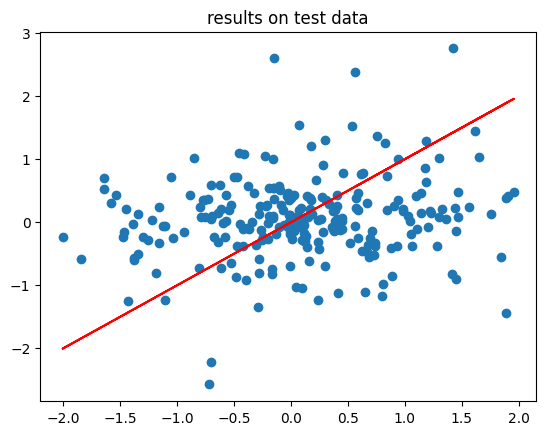

In [132]:
from sklearn.neural_network import MLPRegressor
regr_mlp = MLPRegressor(random_state=1, hidden_layer_sizes = (30, 10), max_iter=1000)
regr_mlp.fit(X_train, y_train)

y_pred_mlp = regr_mlp.predict(X_test)
plt.scatter(y_test, y_pred_mlp)
plt.plot(y_test, y_test, color='red')
plt.title("results on test data")
plt.show()

TP: 77 
TP: 54 
% accuracy: 0.5346938775510204
-0.4061949636660742


Text(0.5, 1.0, 'results on test data')

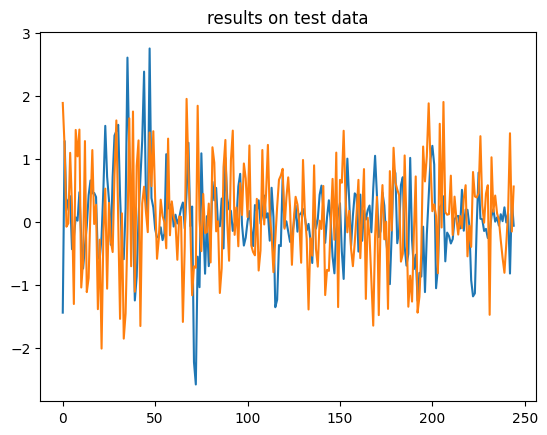

In [133]:
# y_pred_mlp = y_pred_mlp.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

tp = np.dot((1 * (y_pred_mlp>0.0)), (1 * (y_test>0.0)))
tn = np.dot((1 * (y_pred_mlp<0.0)), (1 * (y_test<0.0)))
n_test = y_test.shape[0]
print("TP:", tp, "\nTP:", tn, "\n% accuracy:", ((tp+tn)/n_test))
print(regr_mlp.score(X_test, y_test))

# y_test.shape
# np.concatenate((y_pred_mlp, y_test), axis=1)

plt.plot(y_pred_mlp)
plt.plot(y_test)
plt.title("results on test data")

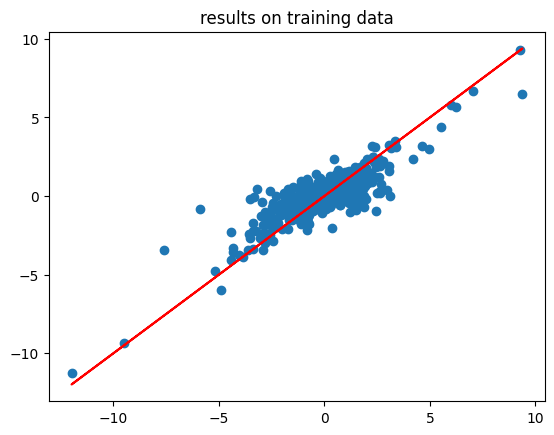

In [134]:
y_pred_mlp = regr_mlp.predict(X_train)

plt.scatter(y_train, y_pred_mlp)
plt.plot(y_train, y_train, color='red')
plt.title("results on training data")
plt.show()

In [123]:
tp = np.dot((1 * (y_pred_mlp>0.0)), (1 * (y_train>0.0)))
tn = np.dot((1 * (y_pred_mlp<0.0)), (1 * (y_train<0.0)))
n_train = y_train.shape[0]
print(tp, tn, ((tp+tn)/n_train))
regr_mlp.score(X_train, y_train)

444 278 0.7352342158859471


0.7084376374559878

Text(0.5, 1.0, 'results on training data')

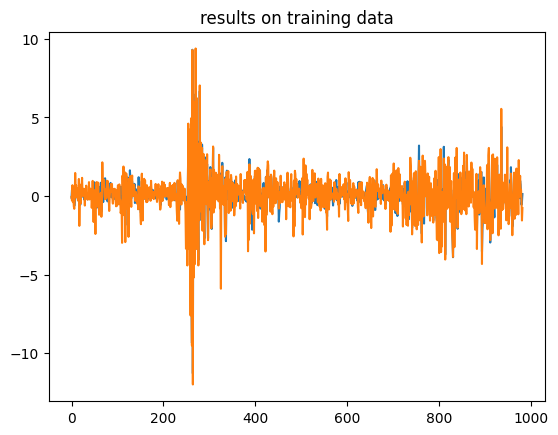

In [135]:
plt.plot(y_pred_mlp)
plt.plot(y_train)
plt.title("results on training data")

## DECISION TREE

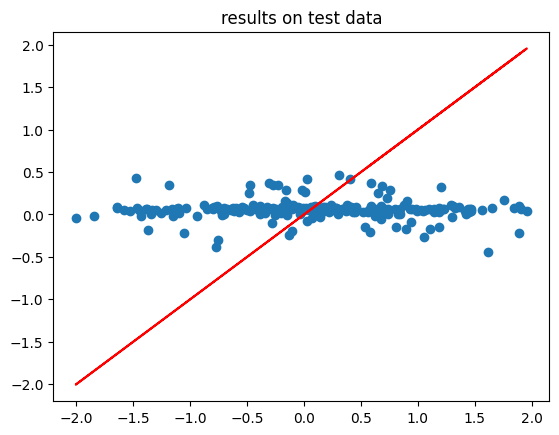

In [138]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(max_depth=10, random_state=0)
regr_rf.fit(X_train, y_train)

y_pred_rf = regr_rf.predict(X_test)
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test, color='red')
plt.title("results on test data")
plt.show()

TP: 118 
TP: 16 
% accuracy: 0.5469387755102041
-0.032339370867254136


Text(0.5, 1.0, 'results on test data')

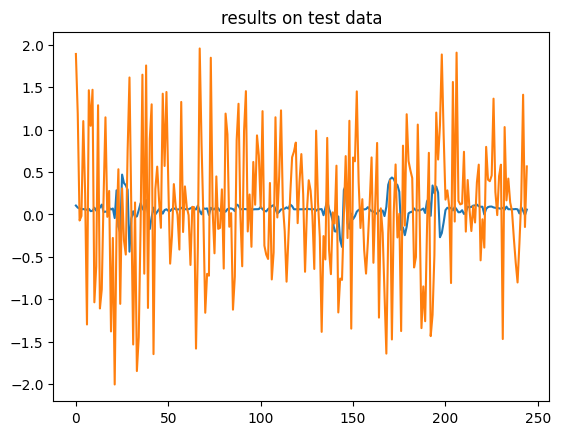

In [141]:
tp = np.dot((1 * (y_pred_rf > 0.0)), (1 * (y_test > 0.0)))
tn = np.dot((1 * (y_pred_rf < 0.0)), (1 * (y_test < 0.0)))
n_test = y_test.shape[0]
print("TP:", tp, "\nTP:", tn, "\n% accuracy:", ((tp + tn) / n_test))
print(regr_rf.score(X_test, y_test))

plt.plot(y_pred_rf)
plt.plot(y_test)
plt.title("results on test data")

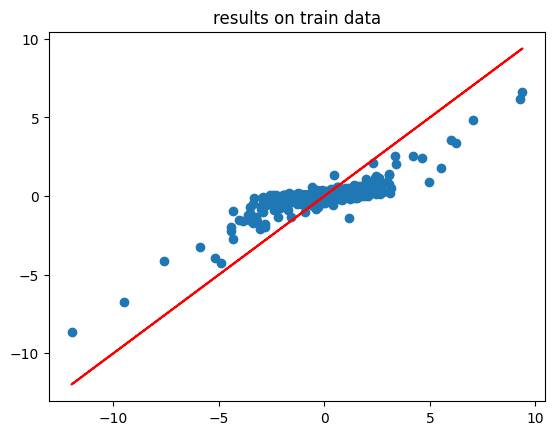

In [142]:
y_pred_rf = regr_rf.predict(X_train)
plt.scatter(y_train, y_pred_rf)
plt.plot(y_train, y_train, color='red')
plt.title("results on train data")
plt.show()

492 175 0.6792260692464358
0.5224942013911851


Text(0.5, 1.0, 'results on training data')

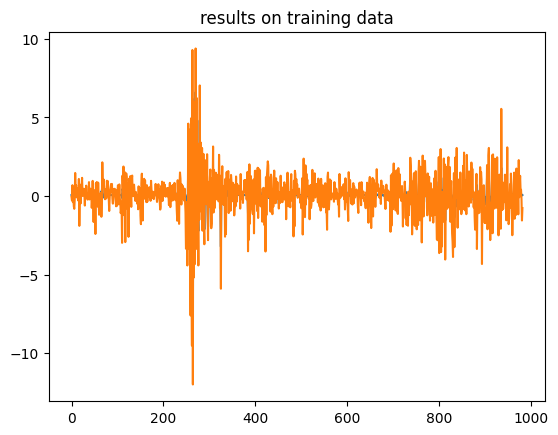

In [146]:
tp = np.dot((1 * (y_pred_rf > 0.0)), (1 * (y_train > 0.0)))
tn = np.dot((1 * (y_pred_rf < 0.0)), (1 * (y_train < 0.0)))
n_train = y_train.shape[0]
print(tp, tn, ((tp + tn) / n_train))
print(regr_rf.score(X_train, y_train))

plt.plot(y_pred_rf)
plt.plot(y_train)
plt.title("results on training data")